In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.layers.core import Dense, Dropout, Activation
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("[Info] train data={:7,}".format(len(train_images)))  
print("[Info] test  data={:7,}".format(len(test_images)))  

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[Info] train data= 60,000
[Info] test  data= 10,000


In [2]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def show_train_history(train_history, train, validation, node):  
    plt.plot(train_history.history[train], linewidth=3)  
    plt.plot(train_history.history[validation], linewidth=3)  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid(True)
    if train == 'acc':
        plt.savefig("hidden nodes_acc_" + str(node) + ".jpg")
    if train == 'loss':
        plt.savefig("hidden nodes_loss_" + str(node) + ".jpg")
    plt.show()  

In [12]:
#32 nodes
network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(28 * 28,)))
network.add(Dropout(0.5))
network.add(layers.Dense(32, activation='relu'))
network.add(Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_32 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)
#print(train_history.history)

print("[Info] Model summary:")
network.summary()

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 44us/step - loss: 2.1841 - acc: 0.1841 - val_loss: 1.8440 - val_acc: 0.6265
Epoch 2/20
48000/48000 [==============================] - 2s 37us/step - loss: 1.8265 - acc: 0.3540 - val_loss: 1.3228 - val_acc: 0.7111
Epoch 3/20
48000/48000 [==============================] - 2s 35us/step - loss: 1.5544 - acc: 0.4490 - val_loss: 1.0291 - val_acc: 0.7841
Epoch 4/20
48000/48000 [==============================] - 2s 35us/step - loss: 1.3969 - acc: 0.5045 - val_loss: 0.8635 - val_acc: 0.8177
Epoch 5/20
48000/48000 [==============================] - 2s 33us/step - loss: 1.2747 - acc: 0.5494 - val_loss: 0.7595 - val_acc: 0.8388
Epoch 6/20
48000/48000 [==============================] - 2s 39us/step - loss: 1.1977 - acc: 0.5777 - val_loss: 0.6921 - val_acc: 0.8534
Epoch 7/20
48000/48000 [==============================] - 2s 32us/step - loss: 1.1387 - acc: 0.6016 - val_loss: 0.6408 - val_acc

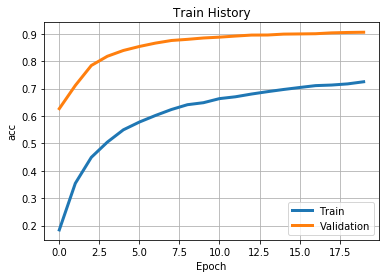

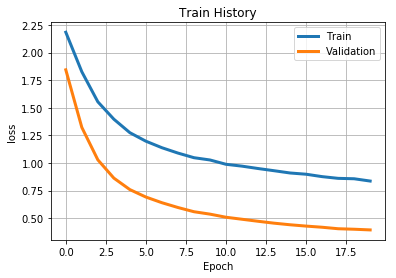

60000/60000 [==============================] - 3s 44us/step

[Info] Accuracy of testing data = 90.1%


In [13]:
node = 32
show_train_history(train_history_32, 'acc', 'val_acc', node)
show_train_history(train_history_32, 'loss', 'val_loss', node)

scores_32 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_32[1]*100.0)) 

In [5]:
#64 nodes
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
network.add(Dropout(0.5))
network.add(layers.Dense(64, activation='relu'))
network.add(Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_64 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)
#print(train_history.history)

print("[Info] Model summary:")
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 98us/step - loss: 2.0791 - acc: 0.2692 - val_loss: 1.5866 - val_acc: 0.6893
Epoch 2/20
48000/48000 [==============================] - 2s 34us/step - loss: 1.5692 - acc: 0.4791 - val_loss: 1.0052 - val_acc: 0.7987
Epoch 3/20
48000/48000 [==============================] - 2s 34us/step - loss: 1.2605 - acc: 0.5797 - val_loss: 0.7407 - val_acc: 0.8436
Epoch 4/20
48000/48000 [==============================] - 2s 36us/step - loss: 1.0826 - acc: 0.6409 - val_loss: 0.6054 - val_acc: 0.8667
Epoch 5/20
48000/48000 [==============================] - 2s 33us/step - loss: 0.9704 - acc: 0.6820 - val_loss: 0.5247 - val_acc: 0.8791
Epoch 6/20
48000/48000 [======

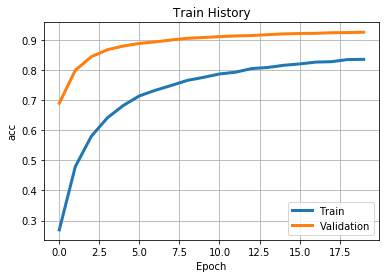

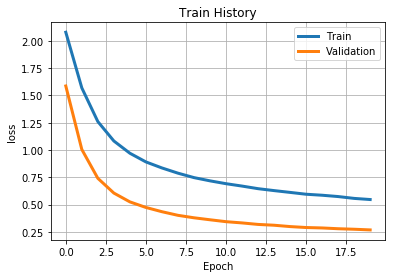

60000/60000 [==============================] - 3s 45us/step

[Info] Accuracy of testing data = 92.1%


In [7]:
node = 64
show_train_history(train_history_64, 'acc', 'val_acc', node)
show_train_history(train_history_64, 'loss', 'val_loss', node)

scores_64 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_64[1]*100.0)) 

In [8]:
#128 nodes
network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
network.add(Dropout(0.5))
network.add(layers.Dense(128, activation='relu'))
network.add(Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_128 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)
#print(train_history.history)

print("[Info] Model summary:")
network.summary()

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 43us/step - loss: 1.9604 - acc: 0.3298 - val_loss: 1.2600 - val_acc: 0.7442
Epoch 2/20
48000/48000 [==============================] - 2s 36us/step - loss: 1.2740 - acc: 0.5852 - val_loss: 0.7222 - val_acc: 0.8373
Epoch 3/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.9668 - acc: 0.6861 - val_loss: 0.5425 - val_acc: 0.8671
Epoch 4/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.8127 - acc: 0.7407 - val_loss: 0.4525 - val_acc: 0.8823
Epoch 5/20
48000/48000 [==============================] - 2s 35us/step - loss: 0.7192 - acc: 0.7748 - val_loss: 0.3968 - val_acc: 0.8938
Epoch 6/20
48000/48000 [==============================] - 2s 35us/step - loss: 0.6504 - acc: 0.8004 - val_loss: 0.3610 - val_acc: 0.9013
Epoch 7/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.5998 - acc: 0.8164 - val_loss: 0.3343 - val_acc

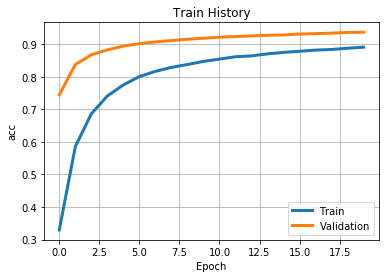

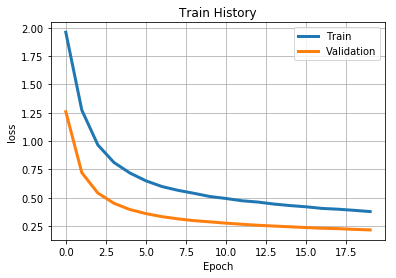

60000/60000 [==============================] - 3s 49us/step

[Info] Accuracy of testing data = 93.5%


In [9]:
node = 128
show_train_history(train_history_128, 'acc', 'val_acc', node)
show_train_history(train_history_128, 'loss', 'val_loss', node)

scores_128 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_128[1]*100.0)) 

In [10]:
#256 nodes
network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network.add(Dropout(0.5))
network.add(layers.Dense(256, activation='relu'))
network.add(Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_256 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)
#print(train_history.history)

print("[Info] Model summary:")
network.summary()

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 55us/step - loss: 1.7380 - acc: 0.4256 - val_loss: 0.9051 - val_acc: 0.8098
Epoch 2/20
48000/48000 [==============================] - 2s 45us/step - loss: 1.0018 - acc: 0.6810 - val_loss: 0.5488 - val_acc: 0.8645
Epoch 3/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.7658 - acc: 0.7582 - val_loss: 0.4365 - val_acc: 0.8844
Epoch 4/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.6540 - acc: 0.7967 - val_loss: 0.3788 - val_acc: 0.8958
Epoch 5/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.5832 - acc: 0.8216 - val_loss: 0.3430 - val_acc: 0.9042
Epoch 6/20
48000/48000 [==============================] - 2s 43us/step - loss: 0.5339 - acc: 0.8373 - val_loss: 0.3180 - val_acc: 0.9110
Epoch 7/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.4941 - acc: 0.8511 - val_loss: 0.2977 - val_acc

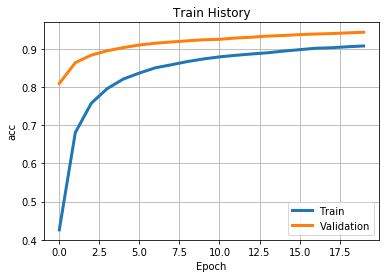

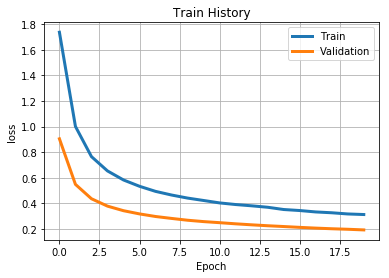

60000/60000 [==============================] - 3s 48us/step

[Info] Accuracy of testing data = 94.2%


In [11]:
node = 256
show_train_history(train_history_256, 'acc', 'val_acc', node)
show_train_history(train_history_256, 'loss', 'val_loss', node)

scores_256 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_256[1]*100.0)) 

In [14]:
#512 nodes
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dropout(0.5))
network.add(layers.Dense(512, activation='relu'))
network.add(Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_512 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)
#print(train_history.history)

print("[Info] Model summary:")
network.summary()

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 62us/step - loss: 1.5858 - acc: 0.5028 - val_loss: 0.7561 - val_acc: 0.8438
Epoch 2/20
48000/48000 [==============================] - 3s 53us/step - loss: 0.8331 - acc: 0.7407 - val_loss: 0.4692 - val_acc: 0.8793
Epoch 3/20
48000/48000 [==============================] - 3s 53us/step - loss: 0.6380 - acc: 0.8041 - val_loss: 0.3830 - val_acc: 0.8968
Epoch 4/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.5473 - acc: 0.8347 - val_loss: 0.3377 - val_acc: 0.9058
Epoch 5/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.4867 - acc: 0.8533 - val_loss: 0.3092 - val_acc: 0.9127
Epoch 6/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.4524 - acc: 0.8648 - val_loss: 0.2898 - val_acc: 0.9177
Epoch 7/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.4195 - acc: 0.8766 - val_loss: 0.2751 - val_acc

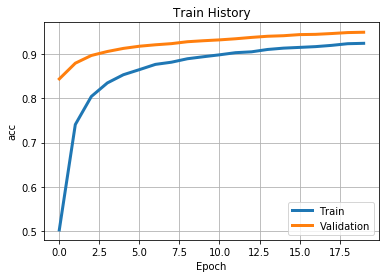

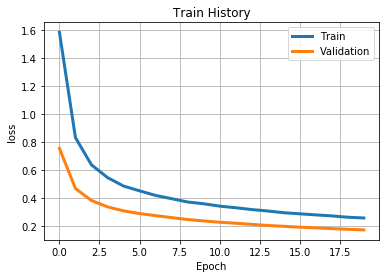

60000/60000 [==============================] - 4s 60us/step

[Info] Accuracy of testing data = 94.7%


In [15]:
node = 512
show_train_history(train_history_512, 'acc', 'val_acc', node)
show_train_history(train_history_512, 'loss', 'val_loss', node)

scores_512 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_512[1]*100.0)) 

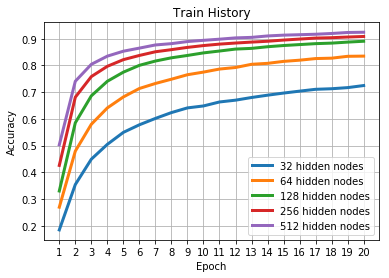

In [25]:
plt.plot(train_history_32.history['acc'], linewidth=3)
plt.plot(train_history_64.history['acc'], linewidth=3)
plt.plot(train_history_128.history['acc'], linewidth=3)
plt.plot(train_history_256.history['acc'], linewidth=3)
plt.plot(train_history_512.history['acc'], linewidth=3)
plt.title('Train History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
plt.legend(['32 hidden nodes','64 hidden nodes','128 hidden nodes','256 hidden nodes','512 hidden nodes'], loc='best')
plt.grid(True)
plt.savefig('hidden_nodes_acc_all.jpg',dpi=300)

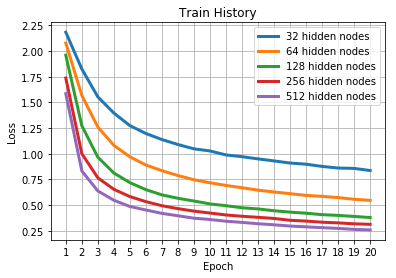

In [26]:
plt.plot(train_history_32.history['loss'], linewidth=3)
plt.plot(train_history_64.history['loss'], linewidth=3)
plt.plot(train_history_128.history['loss'], linewidth=3)
plt.plot(train_history_256.history['loss'], linewidth=3)
plt.plot(train_history_512.history['loss'], linewidth=3)
plt.title('Train History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
plt.legend(['32 hidden nodes','64 hidden nodes','128 hidden nodes','256 hidden nodes','512 hidden nodes'], loc='best')
plt.grid(True)
plt.savefig('hidden_nodes_loss_all.jpg',dpi=300)

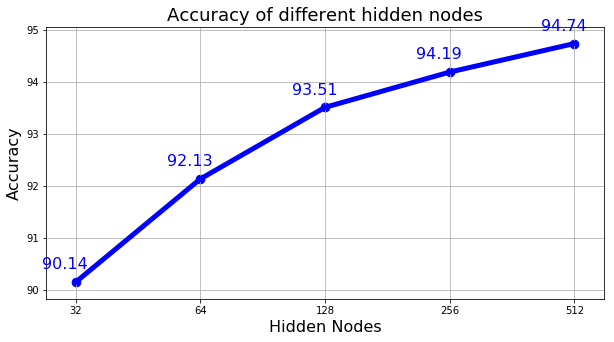

In [24]:
acc = [round(scores_32[1]*100,2),round(scores_64[1]*100,2),round(scores_128[1]*100,2),round(scores_256[1]*100,2),round(scores_512[1]*100,2)]
x = ['32','64','128','256','512']
plt.figure(figsize=(10,5))
plt.plot(x,acc,'b',lw=5)
plt.scatter(x, acc, s = 75,color='b')
plt.title('Accuracy of different hidden nodes', fontsize='18')
plt.xlabel('Hidden Nodes',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.grid(True)
for x,y in enumerate(acc):
    plt.text(x+0.1,y+0.25,'%s' %y, ha='right', color='b',fontsize=16)
plt.savefig('Accuracy of different hidden nodes.jpg',dpi=300)